# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.


The objective is to develop a predictive model for used car prices using a dataset of car features.  
This involves identifying and quantifying the relationships between car attributes (e.g., mileage, age, make, model, condition) and the target variable, price.  
The model will be evaluated on its ability to accurately predict prices for unseen cars and to identify the most influential features, providing insights into key drivers of used car valuations.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('data/vehicles.csv')

df = df.dropna()

#Convert years to age

current_year = 2024
df['age'] = current_year - df['year']

# Convert cylinders which is a key price deteminent to float
import re

def extract_first_number(text):
  match = re.search(r'\d+', str(text))
  if match:
    return int(match.group(0))
  else:
    return None

df['cylinders'] = df['cylinders'].apply(extract_first_number)

# Convert condition column which is a key price deteminent to float
condition_mapping = {'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0}
df['condition'] = df['condition'].map(condition_mapping)

# Drop the 'id' column
df = df.drop('id', axis=1)
df = df.drop('year', axis=1)
df = df.drop('VIN', axis=1)
df = df.drop('region', axis=1)

print(df.head())
print(df.info())
print(df.describe())



<ipython-input-23-6c9676fe72b5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = current_year - df['year']
<ipython-input-23-6c9676fe72b5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cylinders'] = df['cylinders'].apply(extract_first_number)
<ipython-input-23-6c9676fe72b5>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

     price manufacturer              model  condition  cylinders fuel  \
126      0    chevrolet  express cargo van          4        6.0  gas   
127      0    chevrolet  express cargo van          4        6.0  gas   
128      0    chevrolet  express cargo van          4        6.0  gas   
215   4000       toyota               echo          3        4.0  gas   
219   2500          bmw               525i          1        6.0  gas   

     odometer title_status transmission drive       size   type paint_color  \
126   68472.0        clean    automatic   rwd  full-size    van       white   
127   69125.0        clean    automatic   rwd  full-size    van       white   
128   66555.0        clean    automatic   rwd  full-size    van       white   
215  155000.0        clean    automatic   fwd    compact  sedan        blue   
219  110661.0        clean    automatic   rwd   mid-size  sedan       white   

    state   age  
126    al   6.0  
127    al   5.0  
128    al   6.0  
215    al  22.

condition    0.138468
cylinders    0.308772
odometer    -0.199988
age         -0.254059
Name: price, dtype: float64


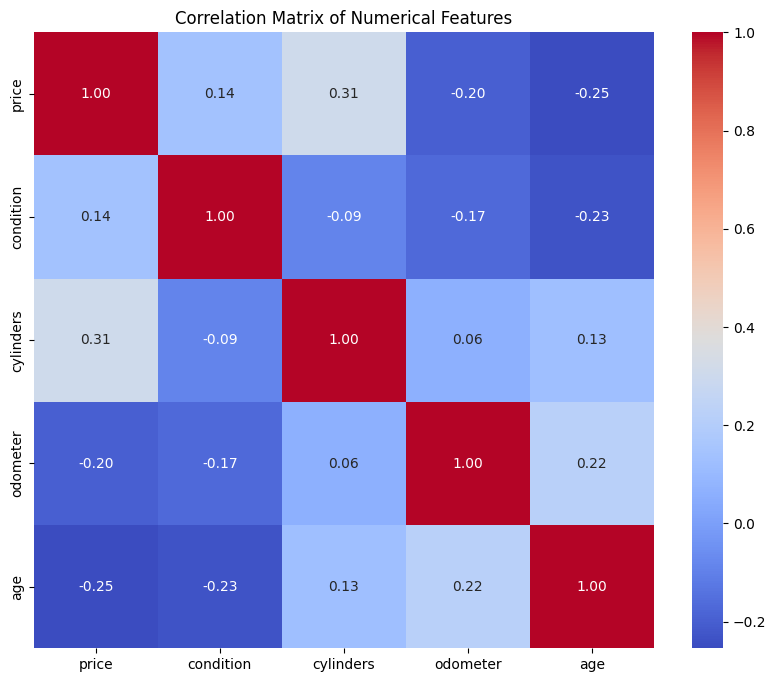

In [24]:
# Calculate correlations between numerical features and the target variable (price)

numerical_features = df.select_dtypes(include=['number'])
correlations = numerical_features.corr()['price'].drop('price')  # Exclude self-correlation
print(correlations)

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('images/Correlation.png')
plt.show()

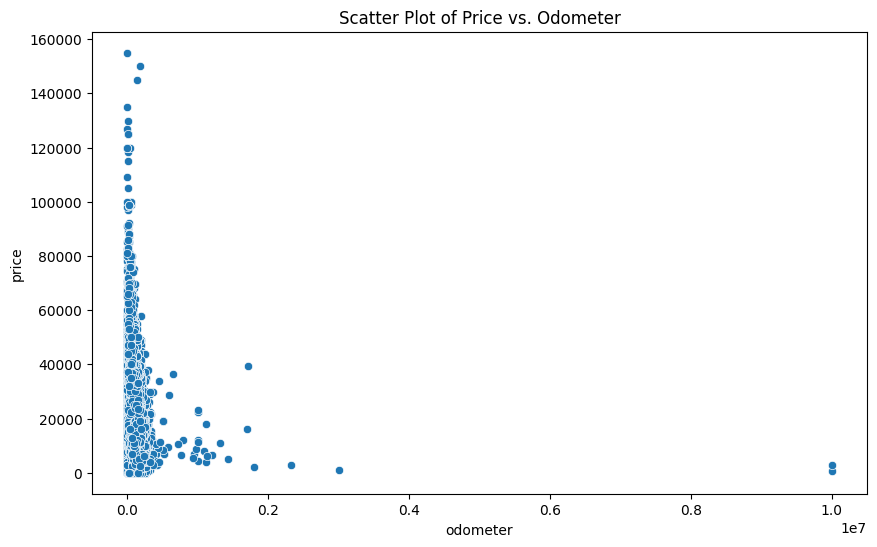

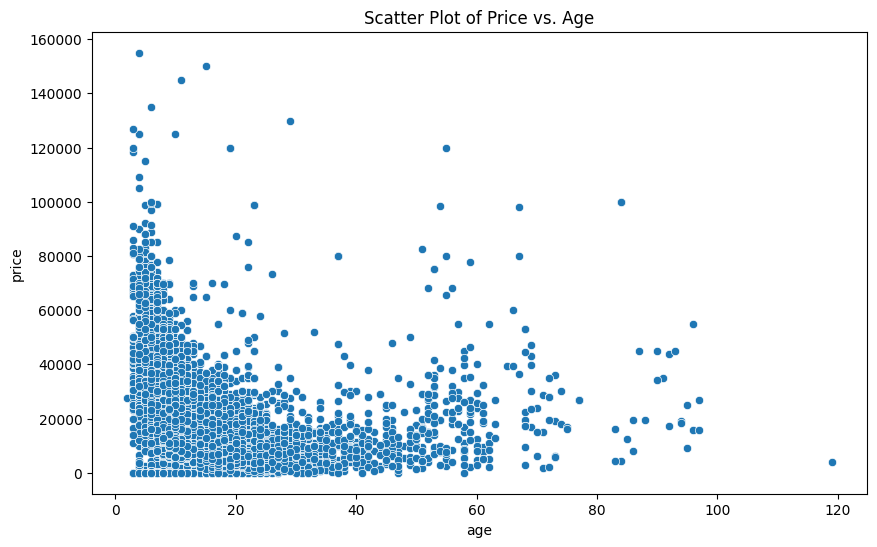

In [25]:

# Identify potential outliers for odometer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=df)
plt.title('Scatter Plot of Price vs. Odometer')
plt.savefig('images/Price vs Odometer.png')
plt.show()


# Identify potential outliers  for age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='price', data=df)
plt.title('Scatter Plot of Price vs. Age')
plt.savefig('images/Price vs Age.png')
plt.show()

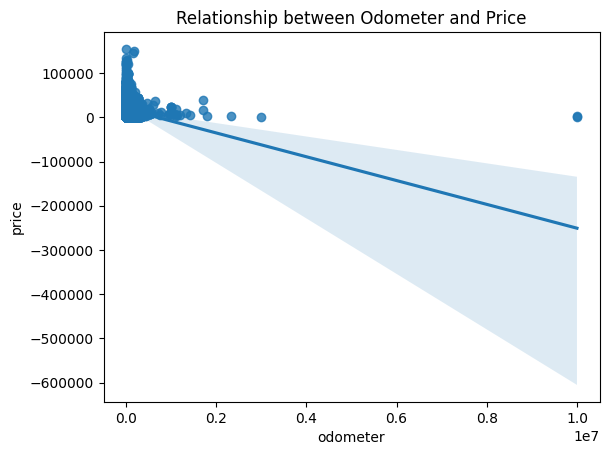

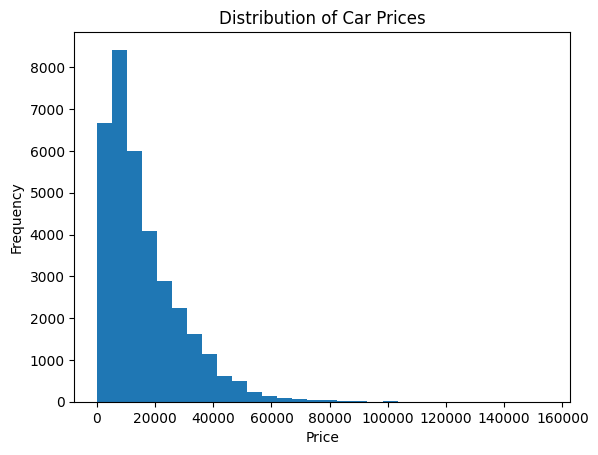

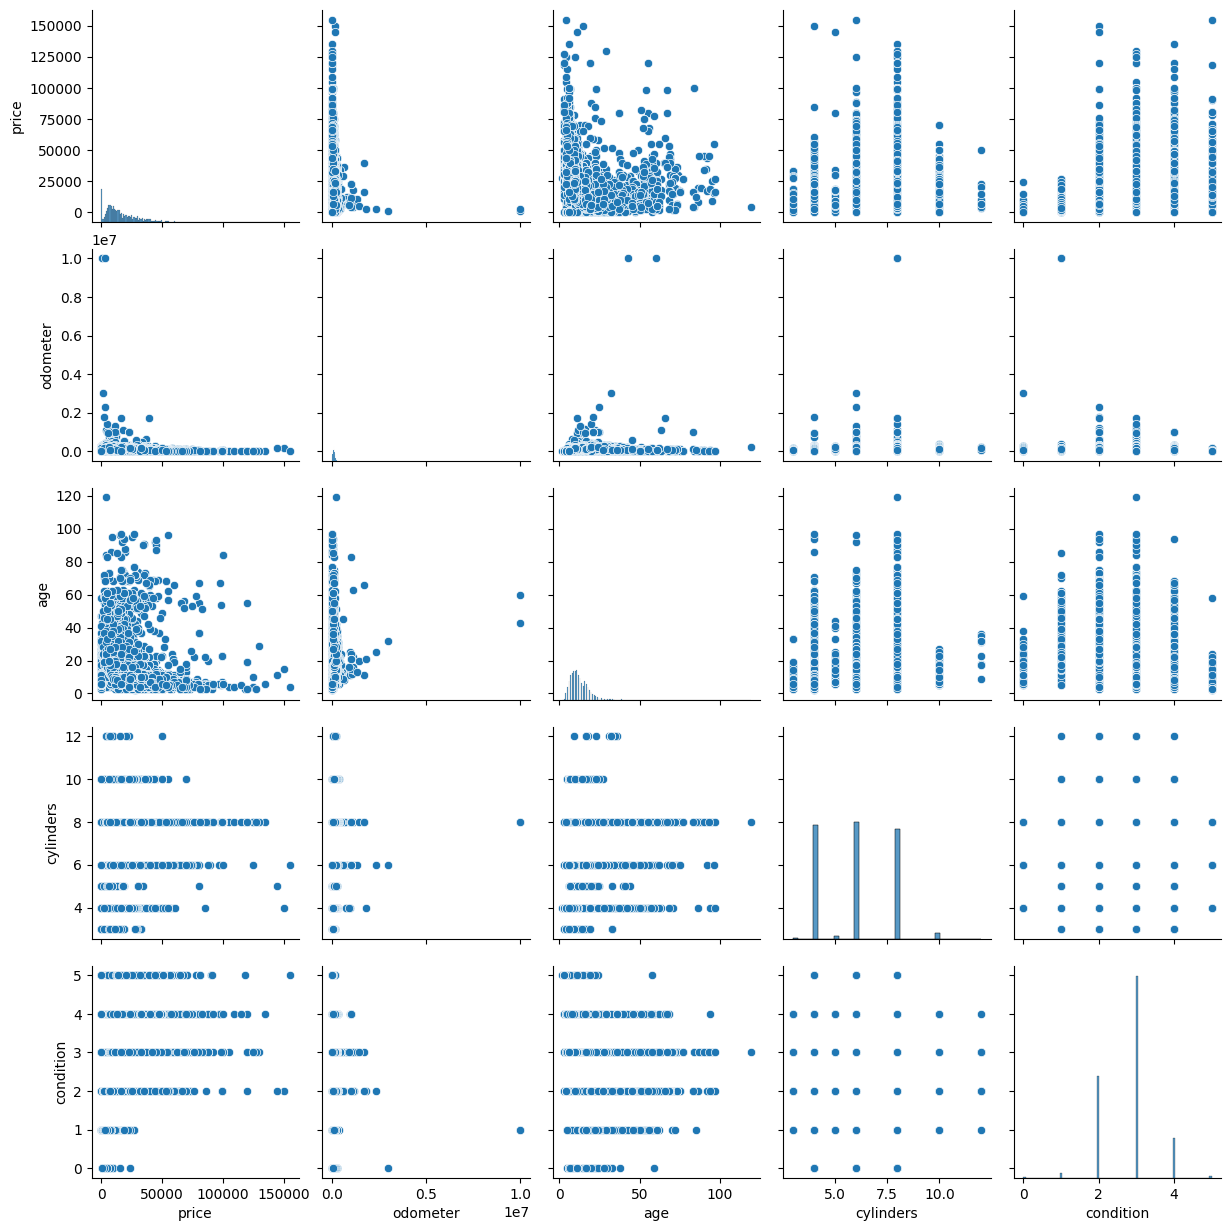

In [26]:
# Scatter plot with regression line
sns.regplot(x='odometer', y='price', data=df)
plt.title('Relationship between Odometer and Price')
plt.savefig('images/Odometer vs Price.png')
plt.show()


# Histogram of car prices
plt.hist(df['price'], bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig('images/Price Distribution.png')
plt.show()



# Pairplot to show relationships between multiple numerical features
sns.pairplot(df[['price', 'odometer', 'age', 'cylinders', 'condition']])
plt.savefig('images/Pairplot.png')
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer # Import SimpleImputer



X = df.drop('price', axis=1)
y = df['price']

# Handle non-numerical features using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer before scaling
imputer = SimpleImputer(strategy='mean')

#Fit and transform on training data and convert back to DataFrame to preserve columns
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

#Transform test data using the trained imputer and convert back to DataFrame to preserve columns
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)


# Scale numerical features using StandardScaler
numerical_cols = X_train.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])



### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_r2 = r2_score(y_test, linear_model.predict(X_test))
linear_cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2') # 5-fold cross-validation
print(f"Linear Regression R-squared: {linear_r2}")
print(f"Linear Regression Cross-Validation Scores (R-squared): {linear_cv_scores}")
print(f"Mean Linear Regression CV score: {np.mean(linear_cv_scores)}")

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_r2 = r2_score(y_test, lasso_model.predict(X_test))
lasso_cv_scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='r2')
print(f"Lasso Regression R-squared: {lasso_r2}")
print(f"Lasso Regression Cross-Validation Scores (R-squared): {lasso_cv_scores}")
print(f"Mean Lasso Regression CV score: {np.mean(lasso_cv_scores)}")

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_r2 = r2_score(y_test, ridge_model.predict(X_test))
ridge_cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='r2')
print(f"Ridge Regression R-squared: {ridge_r2}")
print(f"Ridge Regression Cross-Validation Scores (R-squared): {ridge_cv_scores}")
print(f"Mean Ridge Regression CV score: {np.mean(ridge_cv_scores)}")

lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the best model on the test set
r2 = r2_score(y_test, y_pred)
print(f"\nTest Set Performance Lasso Model: R^2 = {r2:.3f}")


coefficients = pd.DataFrame({'feature': X_train.columns, 'coefficient': lasso_model.coef_})
print(coefficients.sort_values(by='coefficient', ascending=False).head(10))


#  residual analysis:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.savefig('images/Residual Plot.png')
plt.show()

Linear Regression R-squared: -0.38433038999654956
Linear Regression Cross-Validation Scores (R-squared): [-0.0235257   0.32200641 -0.40191358  0.44088755 -2.13948581]
Mean Linear Regression CV score: -0.36040622520793136


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.272e+11, tolerance: 5.000e+08
  model = cd_fast.enet_coordinate_descent(


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Based on our analysis, mileage and age are major factors affecting used car prices.  
The client should consider adjusting their pricing strategy to reflect this, and potentially adjust their inventory selection to include cars with lower mileage and age, or reposition higher-mileage/older cars with lower prices.

Based on the evaluation:
revisit data preparation if necessary (more feature engineering, different transformations)
revisit data understanding if new insights emerge
consider model retraining or selection of a different model type if current performance is unsatisfactory.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.